# Exercise 2: solution
Reminder: You can always ask for help from within python if you forgot how a certain function works or what the correct ordering of input parameters is. Executing "some_function?" spawns the docstring of the function and "some_function??" the source code.

In [1]:
# scipy.stats.kurtosis?

## Probability density function (pdf)
We will look at a few common distributions and investigate their basic properties.

In [2]:
from __future__ import print_function
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

For your convenience, we define a few pdfs and functions to draw samples from them. Have a look at https://docs.scipy.org/doc/scipy/reference/stats.html: here you can find a list of all probability distributions available in the stats module and all the methods available for each of them. Here we will need the pdf method (for discrete distributions this is called pmf, which stands for probability mass function) to compute the value of the distribution at a certain $x$ value, and the rvs method to generate a random sample from the distribution. Have a look at the documentation for the definition of the parameters.

In [3]:
def gaussian_pdf(x, mu, sigma):
    """Gaussian distribution with mean mu and standard deviation sigma"""
    return scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

def gaussian_sample(number, mu, sigma):
    """Draw samples from a Gaussian distribution
    
    mu: mean
    sigma: standard deviation:
    number: number of samples to be drawn
    """
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=number)

def lognormal_pdf(x, mu, sigma):
    return scipy.stats.lognorm.pdf(x, loc=0, scale=np.exp(mu), s=sigma)

def lognormal_sample(number, mu, sigma):
    return scipy.stats.lognorm.rvs(size=number, loc=0, s=sigma, scale=np.exp(mu))
    
def binomial_pmf(x, n, p):
    return scipy.stats.binom.pmf(x, n, p)

def binomial_sample(number, n, p):
    return scipy.stats.binom.rvs(n, p, size=number)

def poisson_pmf(k, mu):
    return scipy.stats.poisson.pmf(k, mu)

def poisson_sample(number, mu):
    return scipy.stats.poisson.rvs(mu, size=number)

**1a) Generate arrays from the lognormal and poisson pdfs and draw an array of samples from each distribution.**

In [4]:
# Generate arrays for parent pdf and samples
sample_size = 1000
x_gauss = np.linspace(-2, 10, 1000)
x_logn = np.linspace(0, 30, 1000)
x_int = np.arange(0, 10)

# mu, sigma and p are parameters for the distributions we want to study.
# Feel free to change their values to get a feeling of how they impact the distributions
mu = 2.0
sigma = 1
p = 0.5

# Gaussian
g_parent = gaussian_pdf(x_gauss, mu, sigma)
g_sample = gaussian_sample(sample_size, mu, sigma)

# Lognormal
logn_parent = lognormal_pdf(x_logn, mu, sigma)
logn_sample = lognormal_sample(sample_size, mu, sigma)

# Binomial
bin_pdf = binomial_pmf(x_int, n=int(mu/p), p=p)
bin_sample = binomial_sample(sample_size, n=int(mu/p), p=p)

# Poisson
pois_parent = poisson_pmf(x_int, mu=mu)
pois_sample = poisson_sample(sample_size, mu=mu)

**1b) Display your results in axes 1 and 3 in the figure below.**

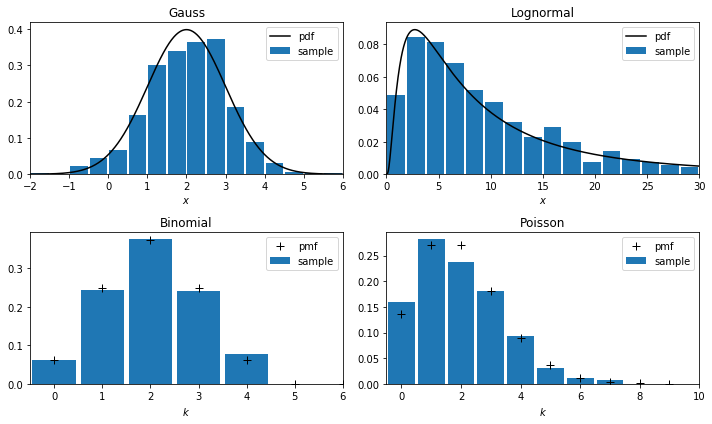

In [5]:
# Plot the generated arrays, comparing the parent distribution and a sample
# Note: Depending on you matplotlib version, the keyword for normalization is "density" or "normed"!
f, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
n_bins = 16

ax[0].set_title(r'Gauss')
ax[0].plot(x_gauss, g_parent, 'k', label='pdf')
ax[0].hist(g_sample, n_bins, density=True, rwidth=0.9, label='sample', range=(-2, 6))
ax[0].set_xlim(-2,6)
ax[0].set_xlabel(r'$x$')
ax[0].legend()

ax[1].set_title(r'Lognormal')
ax[1].plot(x_logn, logn_parent, 'k', label='pdf')
ax[1].hist(logn_sample, n_bins, density=True, rwidth=0.9, label='sample', range=(0, 30))
ax[1].legend()
ax[1].set_xlabel(r'$x$')
ax[1].set_xlim(0, 30)

ax[2].set_title('Binomial')
ax[2].plot(x_int, bin_pdf, 'k+', label='pmf', ms=8)
ax[2].hist(bin_sample, 6, density=True, rwidth=0.9, label='sample', range=(0, 6), align='left')
ax[2].set_xlim(-.5, 6)
ax[2].set_xlabel(r'$k$')
ax[2].legend()

ax[3].set_title('Poisson')
ax[3].set_title('Poisson')
ax[3].plot(x_int, pois_parent, 'k+', label='pmf', ms=8)
ax[3].hist(pois_sample, 10, density=True, rwidth=0.9, label='sample', range=(0, 10), align='left')
ax[3].set_xlim(-.5, 10)
ax[3].set_xlabel(r'$k$')
ax[3].legend()

f.tight_layout()

## Mean, variance and their estimators
**2a) To familiarize yourself with the properties of the distributions, write a function that calculates the first four moments (mean, variance, skewness, kurtosis) of a sample. Write another function to compute the mode and median values of a sample of a discrete distribution. Write another function to compute the first four moments from the parent distributions. Compare the results from the samples and from the distributions. What do you expect?**  
Hints: on "https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics" you cand find the scipy functions to compute the moments, mode and median of a sample.<br>
You can use "scipy.stats.norm.stats" (and similar for the other distributions, look at the documentation!) to compute the moments of the parent distributions. Check the lecture slides and wikipedia if you need to recap some analytical results.  
https://en.wikipedia.org/wiki/Normal_distribution  
https://en.wikipedia.org/wiki/Log-normal_distribution  
https://en.wikipedia.org/wiki/Binomial_distribution  
https://en.wikipedia.org/wiki/Poisson_distribution  .

If you like, you can try your own implementations and test them against scipy.stats.

The 0th moment is just the total probability, following the convention in the lecture notes. Sometimes the value 3 is subtracted from kurtosis to shift a normal distribution to zero kurtosis.

Scipy provides functions to calculate the n-th moment, as well as skewness and kurtosis. The third and fourth moments ($M_3$ and $M_4$, respectively ) are related to skewness $S$ and kurtosis $K$ as follows (with $M_2$ the second moment or variance):
$$ S = \frac{M_3}{M_2^{3/2}}, \qquad K = \frac{M_4}{M_2^2} - 3.$$

In [6]:
def moments(sample):
    #TODO: Calculate the first 4 moments of a sample
    m0 = scipy.stats.moment(sample, 0)
    m1 = np.mean(sample)
    m2 = scipy.stats.moment(sample, 2)
    m3 = scipy.stats.skew(sample)
    m4 = scipy.stats.kurtosis(sample)
    return np.array([m0, m1, m2, m3, m4])

def mode(sample):
    #TODO: Calculate the mode of a sample from a discrete distribution
    return scipy.stats.mode(sample)[0][0]
    
def median(sample):
    #TODO: Calculate the median of a sample from a discrete distribution
    return np.median(sample)

In [7]:
"""
TODO: run the functions from the previous cell to compute the moments of the gaussian, lognormal, binomial
and Poisson samples from the previous exercise, and the mode and median of the binomial and Poisson samples
"""
print('Sample: \t mass, mean, variance, skewness, kurtosis, mode, mean')
print('Gaussian: \t', moments(g_sample).round(2))
print('Lognormal: \t', moments(logn_sample).round(2))
print('Binomial: \t', moments(bin_sample).round(2), mode(bin_sample), median(bin_sample))
print('Poisson: \t', moments(pois_sample).round(2), mode(pois_sample), median(pois_sample))

Sample: 	 mass, mean, variance, skewness, kurtosis, mode, mean
Gaussian: 	 [ 1.    2.03  1.06 -0.19  0.18]
Lognormal: 	 [  1.    12.15 190.06   3.21  14.73]
Binomial: 	 [ 1.    2.03  1.04  0.03 -0.5 ] 2 2.0
Poisson: 	 [1.   1.94 2.09 0.72 0.35] 1 2.0


In [8]:
"""TODO: Write functions to calculate the first 4 moments of the parent distributions"""
print('Distribution: \t mean, variance, skewness, kurtosis')
print('Gaussian: \t', *scipy.stats.norm.stats(mu, sigma, moments='mvsk'))
print('Lognormal: \t', *scipy.stats.lognorm.stats(loc=0, s=sigma, scale=np.exp(mu), moments='mvsk'))
print('Binomial: \t', *scipy.stats.binom.stats(n=mu/p, p=p, moments='mvsk'))
print('Poisson: \t', *scipy.stats.poisson.stats(mu=mu, moments='mvsk'))

Distribution: 	 mean, variance, skewness, kurtosis
Gaussian: 	 2.0 1.0 0.0 0.0
Lognormal: 	 12.182493960703473 255.0156343901585 6.184877138632554 110.9363921763115
Binomial: 	 2.0 1.0 0.0 -0.5
Poisson: 	 2.0 2.0 0.7071067811865476 0.5


### Estimation
Obviously, there is some discrepancy between the expected or "true" values from the parent distribution and the calculated sample moments. We would like to work on the inverse problem of guessing the first two moments given only a sample and knowing that the sample was drawn from a normal distribution (but not knowing its "true" parameters).  
**2b) Remember how to estimate the mean and variance from a sample and how to quantify the uncertainty of the estimation of the mean. Compute the mean and its uncertainty of the gaussian sample from the previous exercise.**   
Hint: check the lecture slides.


The estimation of the mean coincides with the sample mean. The estimation for the variance is $n/(n-1)$ the sample variance.
Given $$\bar{x}=\frac{1}{N} \sum_{i=1}^{N}x_i$$ one can recover its uncertainty with the Gaussian error propagation formula: 
$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$ with the sample variance estimation $$\sigma=\frac{1}{N-1}\sum (x_i - \bar{x})^2$$

In [9]:
N = np.size(g_sample)
mean = np.mean(g_sample)
uncertainty_mean = np.sqrt(1./(N-1) * np.sum((g_sample-mean)**2)) * 1/np.sqrt(N)
print('mean estimator:', mean)
print('uncertainty estimator:', uncertainty_mean)

mean estimator: 2.0296080685927853
uncertainty estimator: 0.032630073093256884


**2c) Given that it can be very cheap to repeatedly sample a distribution with a computer, try to come up with an alternative approach to estimate the uncertainty of the mean. We will come back to this at the end of the course.**

In [10]:
# We just repeat sampling the distribution and calculate the standard deviations of the averages:
reps = 1000
averages = np.zeros(reps)
for i in range(reps):
    g_sample = gaussian_sample(sample_size, mu, sigma)
    averages[i] = np.mean(g_sample)
    
print('mean estimator:', np.mean(averages))
print('uncertainty estimator:', np.std(averages, ddof=1))

mean estimator: 2.000931661213889
uncertainty estimator: 0.03153518934155474


## Multidimensional pdf: covariance and correlation

Imagine your're an astronomer and are measuring a specific parameter called the "Clumping factor". You're interested whether the clumping factor varies with temperature and how. You have 8 measurements with the following values:

In [11]:
clumping = [0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2]
temperature = [2700, 4600, 5120, 5550, 3600, 3990, 4190, 3900] # [K]

**3a) Draw a scatter plot with the temperature on the x-axis and the clumping factor on the y-axis.**

Text(0, 0.5, 'Clumping factor')

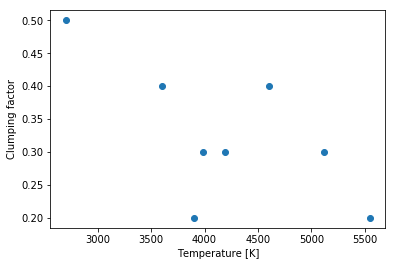

In [12]:
plt.plot(temperature, clumping,'o')
plt.xlabel(r'Temperature [K]')
plt.ylabel('Clumping factor')

**3b) Write a function in python that computes the Covariance. Compare the result to a python numpy or scipy function.**  

In [13]:
def cov(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy = np.multiply(x,y)
    xy_mean = np.mean(xy)
    return xy_mean - x_mean*y_mean

print('naive implementation:', cov(clumping, temperature))
# Covariance matrix
print(np.cov(clumping, temperature, bias=True))
# Off-diagonal entry
print('numpy implementation:', np.cov(clumping, temperature, bias=True)[0, 1])

naive implementation: -53.28124999999977
[[ 9.37500000e-03 -5.32812500e+01]
 [-5.32812500e+01  6.96598438e+05]]
numpy implementation: -53.28125


**3c) Calculate the correlation coefficient. Compare the result to a python numpy or scipy function.**  

In [14]:
def corr(x, y):
    return cov(x, y) / (np.var(x)*np.var(y))**(1./2)

print(corr(clumping, temperature))
print(np.corrcoef(clumping, temperature))

-0.6593219263134944
[[ 1.         -0.65932193]
 [-0.65932193  1.        ]]


**3d) Interpret your results of covariance and correlation coefficient.**  

**3e) If the two variables are uncorrelated, does this also mean they are independent of each other?**<br>
Hint: consider the example $y = x^2$ on $[-1, 1]$ and compute the correlation coefficient between $x$ and $y$. What does this mean?

No, the covariance only tells us about linear correlations. As the example shows, although $x$ and $y$ are clearly not independent, their correlattion coefficient is 0.

In [15]:
x = np.linspace(-1, 1, 11)
y = x**2
print(np.corrcoef(x, y))

[[1.0000000e+00 1.8069255e-17]
 [1.8069255e-17 1.0000000e+00]]


## Bonus
### 3D Plots

Try playing with three dimensional graphs to visualize properties of pdfs with two variables. For example, try visualizing marginal and conditional distributions as was done in lecture 2.
<img src="MultivariateNormal.png" style="height:250px">

### nbextensions
There are some useful extensions to jupyter notebooks, check https://github.com/ipython-contrib/jupyter_contrib_nbextensions if you are interested. There are features like a table of contents to navigate around in notebooks, line numbering for all code cells and options to collapse certain cells to to keep a better overview.

conda install -c conda-forge jupyter_contrib_nbextensions
